In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.losses import  categorical_crossentropy
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf

In [ ]:
(x_train, x_label_train), (x_test, x_label_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Preparing Data

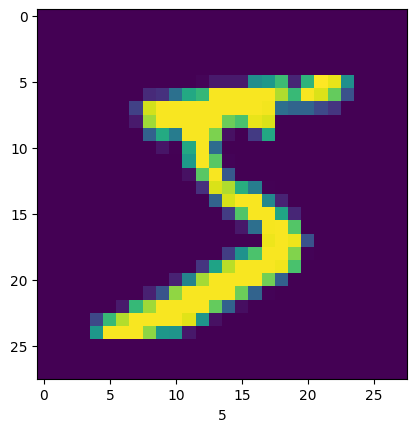

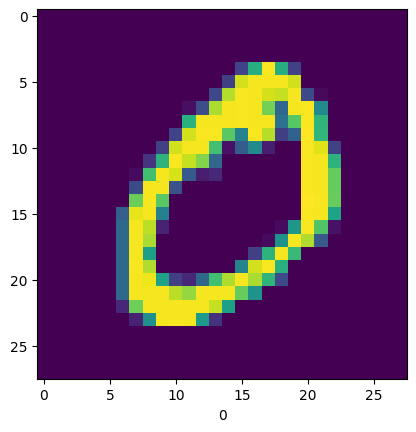

x train shape ->  (60000, 28, 28)
x test shape ->  (10000, 28, 28)


In [ ]:
import matplotlib.pyplot as plt

x_train[0]
for n in range(2):
  plt.imshow(x_train[n])
  plt.xlabel(x_label_train[n])
  plt.show()

print("x train shape -> ", x_train.shape)
print("x test shape -> ", x_test.shape)

In [ ]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
x_label_test = to_categorical(x_label_test)
x_label_train = to_categorical(x_label_train)

# The Model

In [ ]:
model = Sequential(
    [
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]),
        MaxPooling2D((2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, x_label_train, epochs=5, validation_split=0.1, batch_size=64)

Epoch 1/5
844/844 [==============================] - 33s 38ms/step - loss: 0.1819 - accuracy: 0.9443 - val_loss: 0.0553 - val_accuracy: 0.9842
Epoch 2/5
844/844 [==============================] - 32s 38ms/step - loss: 0.0511 - accuracy: 0.9835 - val_loss: 0.0398 - val_accuracy: 0.9895
Epoch 3/5
844/844 [==============================] - 32s 38ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0392 - val_accuracy: 0.9893
Epoch 4/5
844/844 [==============================] - 32s 38ms/step - loss: 0.0273 - accuracy: 0.9917 - val_loss: 0.0396 - val_accuracy: 0.9880
Epoch 5/5
844/844 [==============================] - 31s 36ms/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 0.0315 - val_accuracy: 0.9915


In [ ]:
y_hat = model.predict(x_test[:10])

1/1 [==============================] - 0s 247ms/step


In [ ]:
type(x_test[0])
model.save("number_model.h5")

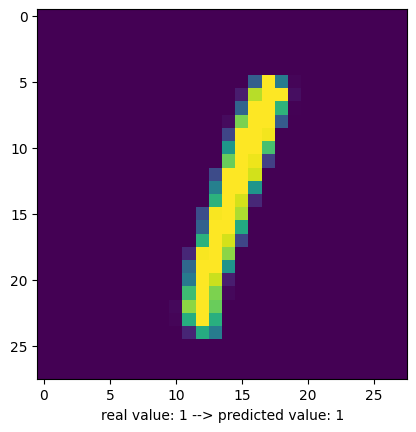

In [ ]:
np.argmax(y_hat[0])
np.argmax(x_label_test[0])

n = 5
plt.imshow(x_test[n])
plt.xlabel(f"real value: {np.argmax(x_label_test[n])} --> predicted value: {np.argmax(y_hat[n])}")
plt.show()


# try model on your data

In [ ]:
image3 = image.load_img("7.png")

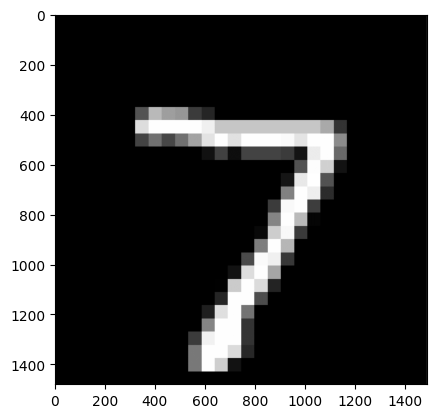

In [ ]:
plt.imshow(image3)

In [ ]:
image3 = tf.image.resize(image3, (28, 28))

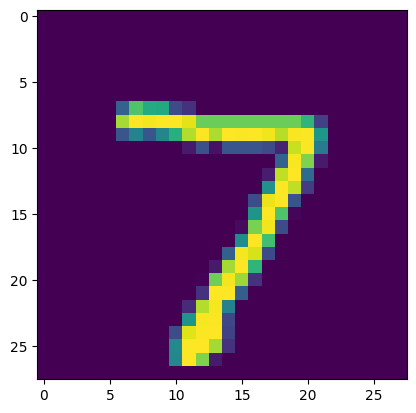

In [ ]:
im3 = tf.convert_to_tensor(image3)
img_flattened = tf.reshape(im3, (28 * 28, 3))
img_grayscale = tf.reduce_mean(img_flattened, axis=-1)
img_grayscale = tf.reshape(img_grayscale, (28, 28, 1))
plt.imshow(img_grayscale)

1/1 [==============================] - 0s 15ms/step


Text(0.5, 0, 'predicted Value:  7')

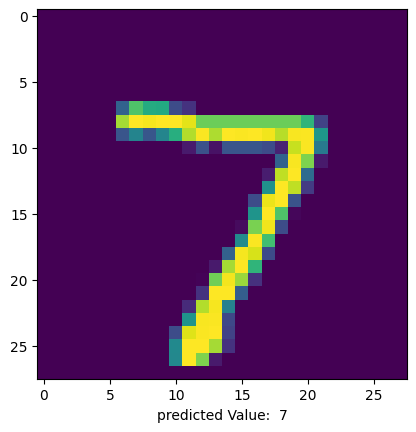

In [ ]:
imnew = np.asarray(img_grayscale)
plt.imshow(imnew)
prediction = model.predict(imnew.reshape((1, 28, 28, 1)))
plt.xlabel(f"predicted Value:  {np.argmax(prediction)}")